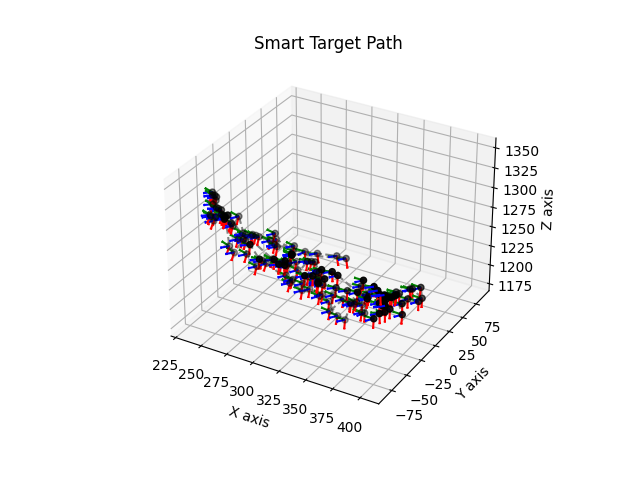

In [1]:
"""
Created on Wed Jan 05 11:18:25 2023

@author: Gerald Fattah
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import HBox, VBox
%matplotlib widget

def x_rotation(vector,theta):
    """Rotates 3-D vector around x-axis"""
    R = np.array([[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0, np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector)

def y_rotation(vector,theta):
    """Rotates 3-D vector around y-axis"""
    R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta), 0, np.cos(theta)]])
    return np.dot(R,vector)

def z_rotation(vector,theta):
    """Rotates 3-D vector around z-axis"""
    R = np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    return np.dot(R,vector)

#x, y, z, pitch, yaw, roll = 0
tb = pd.read_csv(
    'C:\work\src\SmartTargetDataCollection\SmartTargetDataCollection\SmartTargetDataCollection\MeasurementResults.csv')
Table = pd.DataFrame(data=tb)
#print(Table[:5])

x_values = list(Table['X'])
y_values = list(Table['Y'])
z_values = list(Table['Z'])
pitch = list(Table['Pitch'])
yaw = list(Table['Yaw'])
roll = list(Table['Roll'])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Smart Target Path")

diff = max(max(x_values)-min(x_values), max(y_values)-min(y_values), max(z_values)-min(z_values))
ax.set_xlim(min(x_values), min(x_values)+diff)
ax.set_ylim(min(y_values), min(y_values)+diff)
ax.set_zlim(min(z_values), min(z_values)+diff)
# plt.rcParams["figure.autolayout"] = True

    
for x,y,z, alpha, beta, gamma in zip(x_values, y_values, z_values, roll, pitch, yaw):
    rx = [x,0,0]
    ry = [0,y,0]
    rz = [0,0,z]
    
    rx_new = z_rotation(y_rotation(x_rotation(rx, alpha*np.pi/180), beta*np.pi/180),gamma*np.pi/180)
    ry_new = z_rotation(y_rotation(x_rotation(ry, alpha*np.pi/180), beta*np.pi/180),gamma*np.pi/180)
    rz_new = z_rotation(y_rotation(x_rotation(rz, alpha*np.pi/180), beta*np.pi/180),gamma*np.pi/180)

    ax.quiver(x, y, z, rx_new[0], rx_new[1], rx_new[2], length = 10, normalize = True, color = 'green', arrow_length_ratio=0.15)
    ax.quiver(x, y, z, ry_new[0], ry_new[1], ry_new[2], length = 10, normalize = True, color = 'blue', arrow_length_ratio=0.15)
    ax.quiver(x, y, z, rz_new[0], rz_new[1], rz_new[2], length = 10, normalize = True, color = 'red', arrow_length_ratio=0.15)    
    
ax.scatter(x_values,y_values,z_values, color = 'black', linestyle = '-', marker = "o")
ax.plot(x_values, y_values, z_values, color='gray', linestyle = "--")
plt.show()

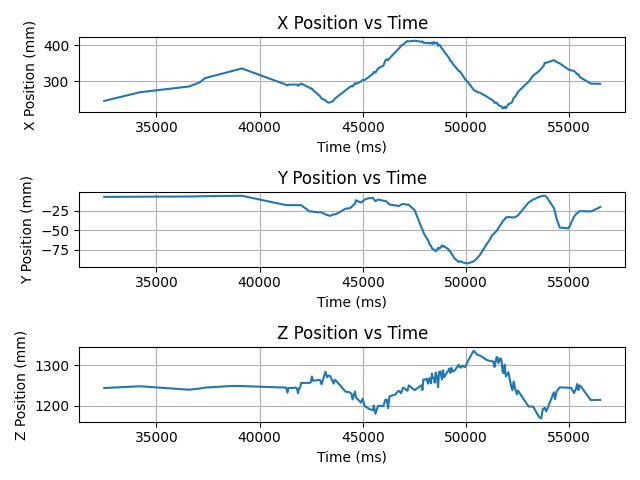

In [2]:
time = Table['Time']
fig2 = plt.figure()
plt.subplot(3,1,1)

plt.xlabel('Time (ms)')
plt.ylabel('X Position (mm)')
plt.title('X Position vs Time')
plt.plot(time, x_values)
plt.grid(True)

plt.subplot(3,1,2)
plt.xlabel('Time (ms)')
plt.ylabel('Y Position (mm)')
plt.title('Y Position vs Time')
plt.plot(time, y_values)
plt.grid(True)

plt.subplot(3,1,3)
plt.xlabel('Time (ms)')
plt.ylabel('Z Position (mm)')
plt.title('Z Position vs Time')
plt.plot(time, z_values)
plt.grid(True)

plt.tight_layout()
plt.show()

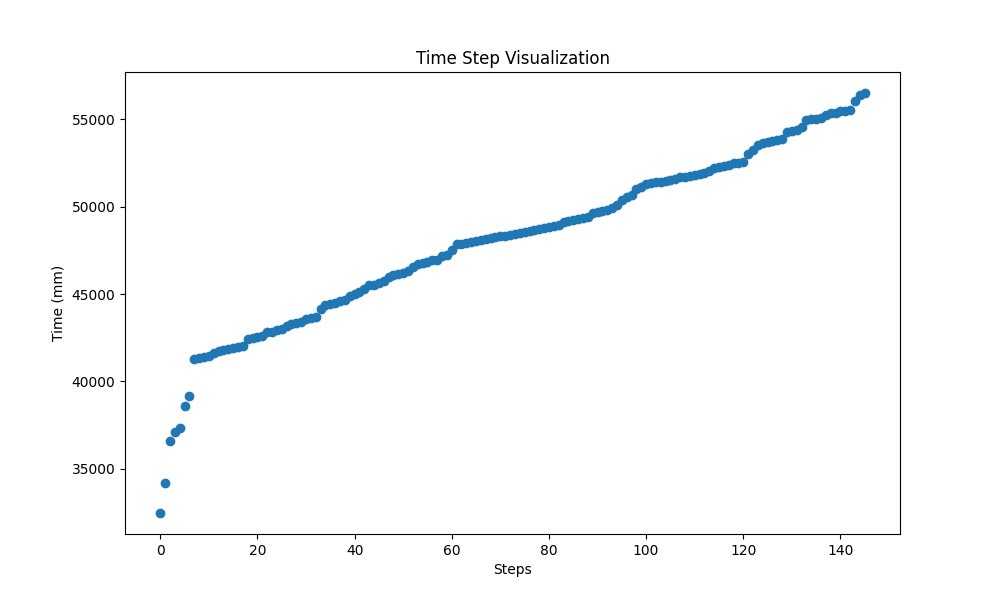

In [3]:
fig3 = plt.figure(figsize = (10,6))
plt.xlabel('Steps')
plt.ylabel('Time (mm)')
plt.title('Time Step Visualization')

steps = np.arange(0,len(time),1)
plt.scatter(steps, time, marker = 'o')
plt.show()